Text(0.5, 0, 'Probability of False Alarm')

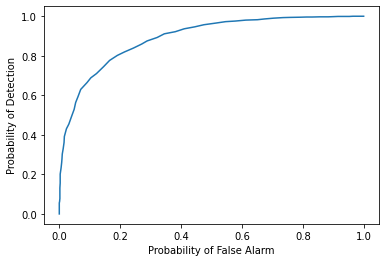

In [38]:
# ROC
import numpy as np
import matplotlib.pyplot as plt
import cv2 

SNR = 3
noise = np.random.randn(1024,1)
sigp = np.sqrt(SNR) + noise
thresh = np.linspace(np.min(noise), np.max(sigp), num=100)
pd = np.zeros((100,1))
pf = np.zeros((100,1))
for n in range(100):
    # as n, the threshold, changes, the probability of detection and false alarm changes
    pd[n] = len(sigp[sigp>thresh[n]])/1024 # probability of detection
    pf[n] = len(noise[noise>thresh[n]])/1024 # probability of false alarm
plt.plot(pf, pd)
plt.ylabel('Probability of Detection')
plt.xlabel('Probability of False Alarm')

In [39]:
"""
Step 7
Finally, let’s consider what would have happened if the signal was not a single point,
but was instead a constant value for a period of time. Create a signal vector that is
all zeros, and then add 10 consecutive points that have a value of 1. Repeat the table
from step 6 and see what changes, if anything.
"""

signal = np.zeros((1024, 1))
signal[26:37, 0] = 1
noise = np.random.randn(1024, 1)
snrs = []
for filter_length in range(1, 6):
    signal_smoothed = cv2.boxFilter(signal, cv2.CV_32F, (1, filter_length)) # filter_length is the number of times we're averaging a signal. In order to have the best SNR ratio, filter length is about the same size of the signal you're detecting. If filter length is greater, then noise gets blended into signal, as demonstrated in this step.
    signal_max = np.max(signal_smoothed)
    noise_smoothed = cv2.boxFilter(noise, cv2.CV_32F, (1, filter_length))
    noise_variance = np.var(noise_smoothed)
    snr = signal_max ** 2 / noise_variance
    snrs.append(snr)
    print("signal max", signal_max)
    print("noise_variance", noise_variance)
    print("snr", snr)
    print("\n")

signal max 1.0
noise_variance 0.9491025
snr 1.053626955923327


signal max 1.0
noise_variance 0.4807258
snr 2.0801879373590904


signal max 1.0
noise_variance 0.31907073
snr 3.1341013654003738


signal max 1.0
noise_variance 0.23148656
snr 4.319905244998326


signal max 1.0
noise_variance 0.18322515
snr 5.457765887401725




[0.40136719]
[0.54882812]
[0.70019531]
[0.77441406]
[0.84472656]


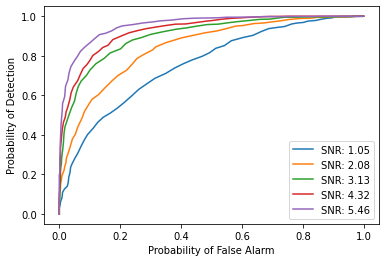

In [62]:
"""
Step 8: See how the ROC Curve changes as SNR increases
Step 9: Let’s say you can accept a PFA of 0.1. How does PD change as the SNR increases from 1 to 10?
"""

for i in range(0, 5):
    SNR = snrs[i] # as SNR increases, the ROC curve becomes closer to a more ideal detector
    noise = np.random.randn(1024,1)
    sigp = np.sqrt(SNR) + noise
    thresh = np.linspace(np.min(noise), np.max(sigp), num=100) # varying threshold from minimum noise to max signal
    pd = np.zeros((100,1))
    pf = np.zeros((100,1))
    for n in range(100):
        pd[n] = len(sigp[sigp>thresh[n]])/1024
        pf[n] = len(noise[noise>thresh[n]])/1024
    plt.plot(pf, pd, label='SNR: ' + str(round(snrs[i], 2)))
    plt.legend()
    plt.ylabel('Probability of Detection')
    plt.xlabel('Probability of False Alarm')

    difference_array = (pf - 0.1)
    difference_array[difference_array < 0] = None # change all negative numbers to nan
    smallest_difference_index = difference_array.argmin() # get index of closest number to 0.1 that's smaller than it
    closest_element = pf[smallest_difference_index]
    print(pd[smallest_difference_index]) # as SNR increases, the probability of detection increases